In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Height-Weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight v/s Height')

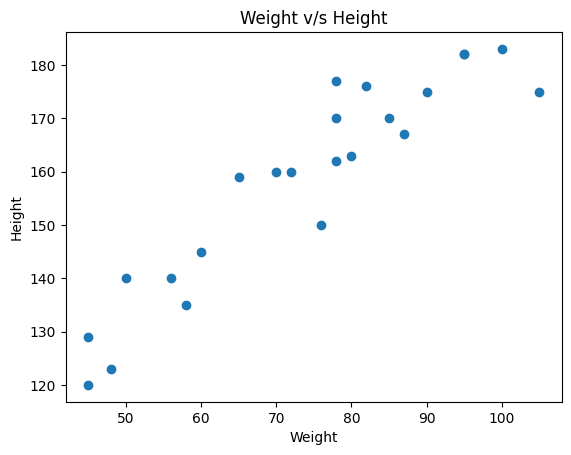

In [8]:
## Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight v/s Height")

In [9]:
# Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


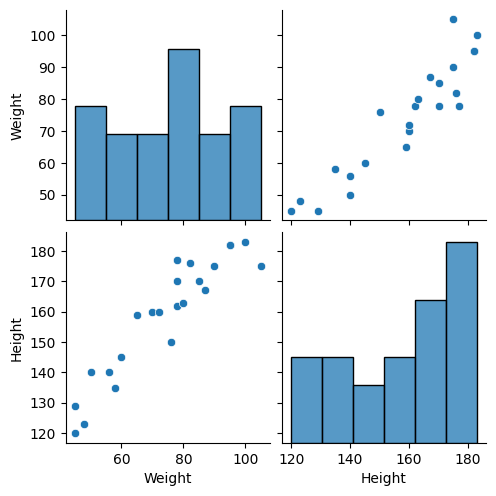

In [15]:
sns.pairplot(data=df)

In [29]:
# Independent and Dependent Features
X = df[['Weight']] # independent feature should be dataframe or 2D array
Y = df['Height'] # can be in series or 1D
np.array(X).shape

(23, 1)

In [28]:
np.array(Y).shape

(23,)

In [19]:
x_series = df['Weight'] # 1D shape which is not desired
np.array(x_series).shape

(23,)

In [59]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [32]:
## Standardization
from sklearn.preprocessing import StandardScaler


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [37]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [38]:
regression = LinearRegression(n_jobs=-1) # n_jobs control the number of parallel jobs, -1 for all avaliable cpu
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [40]:
print("Coefficent/Slope :",regression.coef_)
print("Intercept :",regression.intercept_)


Coefficent/Slope : [17.2982057]
Intercept : 156.47058823529412


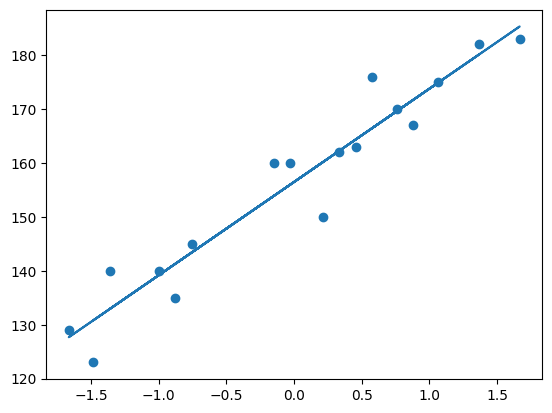

In [43]:
## Plot Training Data and Best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train)) # Best fit line

### Prediction of Test Data
1. Predicted Height Output = intercept + coef_(Weights)
2. y_pred_test=156.470 + 17.29(X_test)

In [44]:
# Prediction for test data
y_pred = regression.predict(X_test)

In [45]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Square Error :",mse)
print("Mean Absoute Error :",mae)
print("Root Mean Square Error :",rmse)

Mean Square Error : 114.84069295228699
Mean Absoute Error : 9.66512588679501
Root Mean Square Error : 10.716374991212605


### R Square
Formula

### R^2 = 1 - SSR/SST
R^2 = coefficent of determination SSR = sum of square of residual SST = Total sum of Squares

In [49]:
from sklearn.metrics import r2_score
r_square_score = r2_score(Y_test, y_pred)
print("R Square :",r_square_score)

R Square : 0.7360826717981276


### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [51]:
# display adjusted r2
Adj_r2 = 1-((1-r_square_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print("Adjust R Square :", Adj_r2)

Adjust R Square : 0.6701033397476595


### Ordinary Least Square

In [52]:
import statsmodels.api as sm

In [54]:
Model = sm.OLS(Y_train,X_train).fit()

In [55]:
prediction = Model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [56]:
print(Model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 22 Jan 2025   Prob (F-statistic):                       0.664
Time:                        00:06:48   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/mylo/Projects/Regression/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [58]:
# prediction for new Data
regression.predict(scaler.transform([[72]])) # Standardization is important

/home/mylo/Projects/Regression/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])